In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [166]:
nodo = 2
periodo = 3
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)

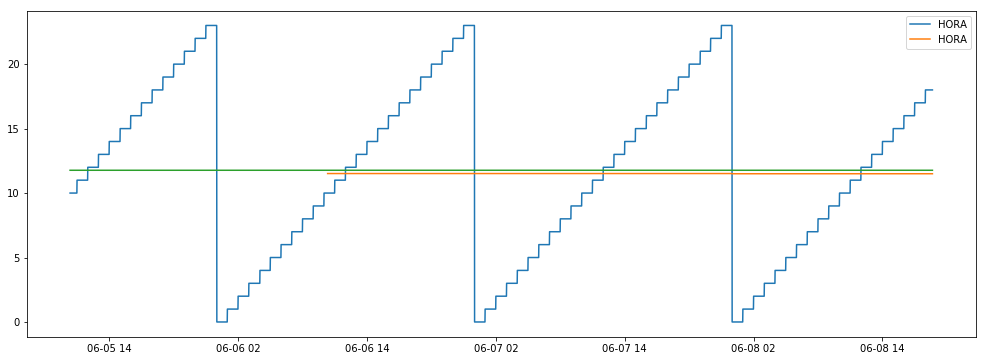

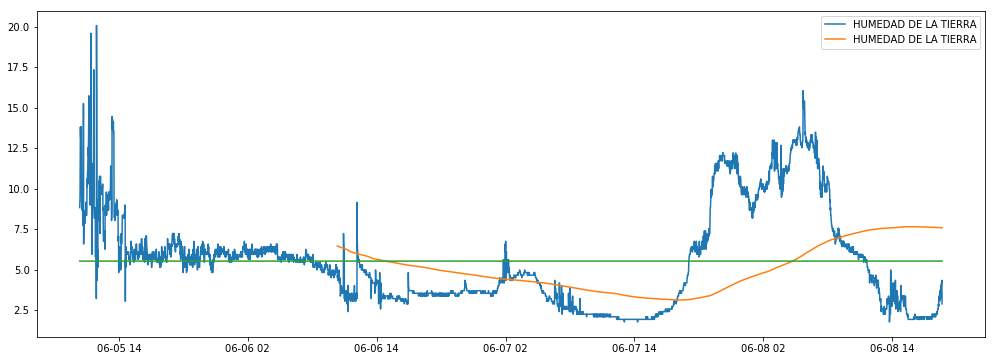

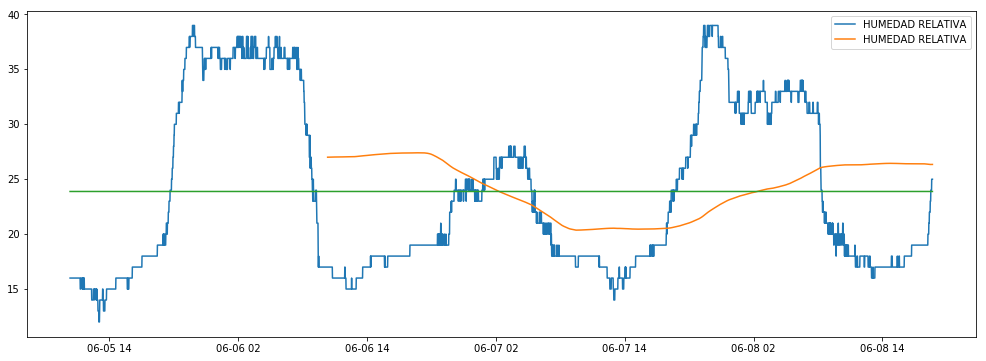

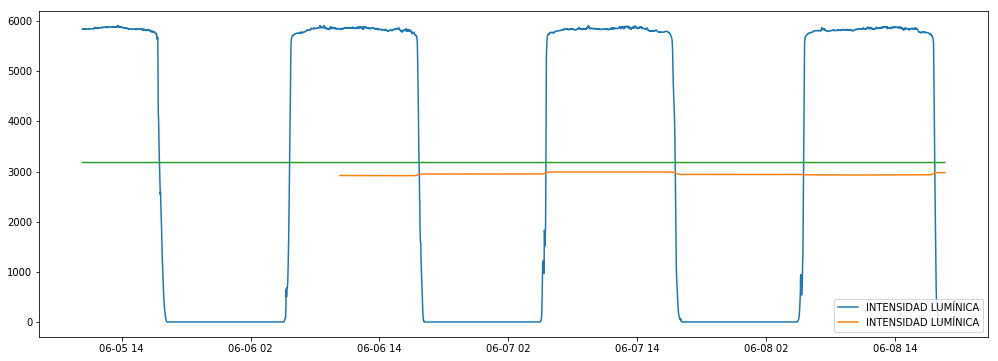

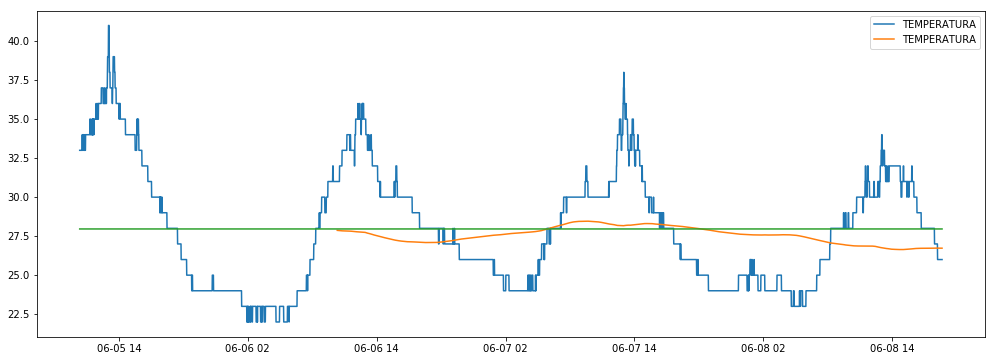

In [167]:
for n in nodosp[2].columns:
    plt.figure(figsize=(17,6))
    plt.plot(nodosp[2][n],label=n)
    t = nodosp[2][n]
    tr = t.mean()
    plt.plot(t.rolling(60*24).mean())
    plt.plot(t.index,[tr]*len(t))
    plt.legend()

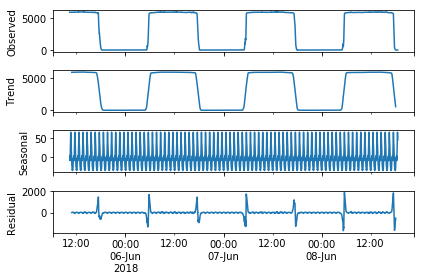

In [168]:
# Ejemplo de descomposición de serie de tiempo
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(nodosp[2].iloc[:,3],
                                                  model='additive', freq=60)  
fig = descomposicion.plot()

In [169]:
df = nodosp[2]
df

,HORA,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-06-05 10:21:00,10.0,8.84,16.0,5841.0,33.0
2018-06-05 10:22:00,10.0,9.16,16.0,5841.0,33.0
2018-06-05 10:23:00,10.0,9.48,16.0,5841.0,33.0
2018-06-05 10:24:00,10.0,11.73,16.0,5835.0,33.0
2018-06-05 10:25:00,10.0,13.82,16.0,5841.0,33.0
...,...,...,...,...,...
2018-06-08 18:35:00,18.0,4.19,25.0,0.0,26.0
2018-06-08 18:36:00,18.0,4.19,25.0,0.0,26.0
2018-06-08 18:37:00,18.0,4.19,25.0,0.0,26.0
2018-06-08 18:38:00,18.0,4.35,25.0,0.0,26.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4819 entries, 2018-06-05 10:21:00 to 2018-06-08 18:39:00
Data columns (total 4 columns):
HUMEDAD DE LA TIERRA    4819 non-null float64
HUMEDAD RELATIVA        4819 non-null float64
INTENSIDAD LUMÍNICA     4819 non-null float64
TEMPERATURA             4819 non-null float64
dtypes: float64(4)
memory usage: 188.2 KB


In [130]:
df.describe()

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
count,4819.000000,4819.000000,4819.000000,4819.000000
mean,5.536362,23.883586,3179.216435,27.960365
std,3.007139,7.769667,2862.609518,3.750617
min,1.780000,12.000000,0.000000,22.000000
25%,3.380000,18.000000,0.000000,24.000000
50%,5.150000,20.000000,5753.000000,28.000000
75%,6.430000,32.000000,5841.000000,30.000000
max,20.080000,39.000000,5912.000000,41.000000


In [170]:
for i in range(5):
    display(df.columns[i],df.iloc[:, i].unique())    

'HORA'

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

'HUMEDAD DE LA TIERRA'

array([ 8.84,  9.16,  9.48, 11.73, 13.82, 13.18, 10.45,  9.8 , 10.29,
        8.68,  9.32, 10.13,  8.04,  7.72, 15.26,  6.59,  7.4 ,  8.52,
        7.88,  8.2 ,  8.36,  9.  , 10.61, 10.77, 11.09, 12.05, 12.53,
       13.01, 13.5 , 15.74, 11.57, 11.89, 12.37, 12.21, 16.39, 15.42,
       19.6 ,  5.95,  7.56, 10.93,  9.64, 17.35,  5.79,  7.24,  6.92,
        3.22, 20.08, 16.06,  4.35,  5.31,  6.27,  5.15,  9.97,  7.08,
        6.76, 11.41, 11.25, 14.46, 13.66, 14.3 , 13.98, 14.14,  4.83,
        5.47,  6.43,  4.99,  3.06,  5.63,  6.11,  4.67,  4.51,  4.19,
        3.38,  3.55,  3.71,  4.03,  3.87,  2.9 ,  2.42,  2.58,  2.74,
        2.26,  2.1 ,  1.94,  1.78, 12.69, 12.85, 13.34, 15.58, 14.94,
       15.1 ])

'HUMEDAD RELATIVA'

array([16., 15., 14., 13., 12., 17., 18., 19., 20., 21., 22., 23., 24.,
       25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
       38., 39.])

'INTENSIDAD LUMÍNICA'

array([5.841e+03, 5.835e+03, 5.847e+03, 5.853e+03, 5.865e+03, 5.876e+03,
       5.859e+03, 5.870e+03, 5.888e+03, 5.882e+03, 5.906e+03, 5.912e+03,
       5.894e+03, 5.900e+03, 5.829e+03, 5.824e+03, 5.818e+03, 5.812e+03,
       5.806e+03, 5.800e+03, 5.788e+03, 5.794e+03, 5.782e+03, 5.777e+03,
       5.765e+03, 5.759e+03, 5.753e+03, 5.718e+03, 5.730e+03, 5.659e+03,
       5.653e+03, 5.624e+03, 5.630e+03, 5.677e+03, 5.636e+03, 5.219e+03,
       4.428e+03, 4.134e+03, 4.082e+03, 3.853e+03, 3.712e+03, 3.536e+03,
       3.325e+03, 3.178e+03, 3.079e+03, 2.879e+03, 2.780e+03, 2.633e+03,
       2.545e+03, 2.592e+03, 2.492e+03, 2.363e+03, 2.211e+03, 2.099e+03,
       2.011e+03, 1.876e+03, 1.700e+03, 1.542e+03, 1.407e+03, 1.260e+03,
       1.190e+03, 1.096e+03, 9.910e+02, 8.790e+02, 7.800e+02, 6.860e+02,
       6.210e+02, 5.160e+02, 4.630e+02, 3.750e+02, 3.280e+02, 2.810e+02,
       2.580e+02, 2.110e+02, 1.930e+02, 1.520e+02, 1.340e+02, 9.900e+01,
       7.600e+01, 6.400e+01, 4.600e+01, 2.900e+01, 

'TEMPERATURA'

array([33., 34., 35., 36., 37., 38., 39., 41., 32., 31., 30., 29., 28.,
       27., 26., 25., 24., 23., 22.])

In [132]:
df.isnull().sum()

HUMEDAD DE LA TIERRA    0
HUMEDAD RELATIVA        0
INTENSIDAD LUMÍNICA     0
TEMPERATURA             0
dtype: int64

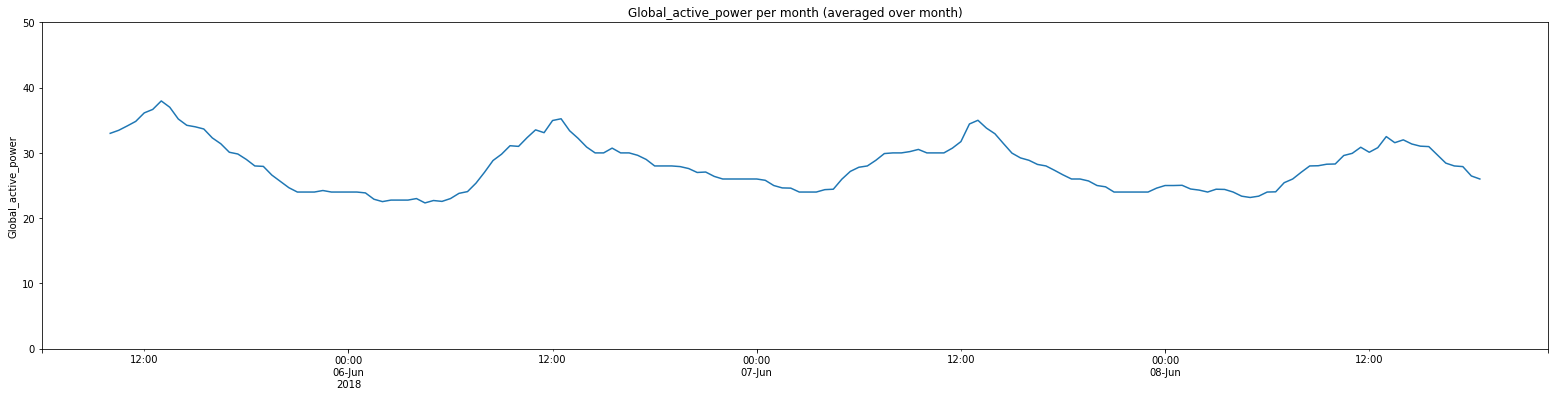

In [164]:
# Sum of 'Global_active_power' resampled over month
#df['TEMPERATURA'].resample('T').mean().plot(kind='bar',figsize=(27,6))
df['TEMPERATURA'].resample('30T').mean().plot(ylim=[0,50],figsize=(27,6))
#plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()
#df['TEMPERATURA'].rolling(3).median().plot(kind='bar',figsize=(27,6))

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 